In [ ]:
import torch


class Model(torch.nn.Module):
  def __init__(self, a: float=10.0, reparam=False):
    super().__init__()
    if reparam:
      self._a = torch.nn.Parameter(torch.tensor(1.0))
    else:
      self._a = torch.nn.Parameter(torch.tensor(a))
    self.reparam = reparam
    self.scale = a
  
  @property
  def a(self):
    if self.reparam:
      return self.scale * self._a
    else:
      return self._a

In [ ]:
def loss(y, y_true=100):
  return (y - y_true).pow(2)

In [ ]:
model1 = Model()
model2 = Model(reparam=True)
lr = 1e-1
optim1 = torch.optim.Adam(model1.parameters(), lr=lr)
optim2 = torch.optim.Adam(model2.parameters(), lr=lr)

a1 = []
a2 = []
for i in range(200):
    optim1.zero_grad()
    optim2.zero_grad()

    loss1 = loss(model1.a)
    loss2 = loss(model2.a)

    loss1.backward()
    loss2.backward()

    a1.append(model1.a.item())
    a2.append(model2.a.item())

    optim1.step()
    optim2.step()

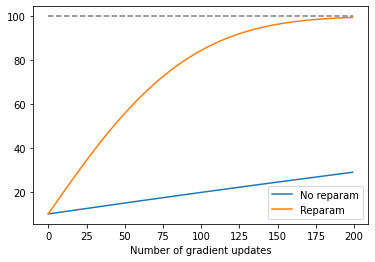

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(a1, label="No reparam")
ax.plot(a2, label="Reparam")
ax.plot([100] * len(a1), label="", ls="--", color="gray")
ax.set(xlabel="Number of gradient updates")
ax.legend()